## Requette SQL

SELECT TOP 20000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount
FROM Posts 
WHERE PostTypeId = 1 AND ViewCount > 10
AND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5

In [1]:
from functions import *

In [2]:
#!pip install gensim
# Intall the contractions package - https://github.com/kootenpv/contractions
#!pip install contractions
#!pip install --upgrade numpy
#!pip install -U spacy && python -m spacy download en
#!pip install --upgrade spacy
#!pip install pyLDAvis
#!pip install nltk
#!pip install --upgrade pip
#!pip install seaborn
#!pip install textblob
#nltk.download()
#nltk.download('stopwords')
#!pip install tqdm


In [3]:
df = pd.read_csv("QueryResults.csv",low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          10000 non-null  object 
 1   Body           10000 non-null  object 
 2   Tags           10000 non-null  object 
 3   Id             10000 non-null  int64  
 4   Score          10000 non-null  int64  
 5   ViewCount      10000 non-null  int64  
 6   FavoriteCount  8902 non-null   float64
 7   AnswerCount    10000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 625.1+ KB


In [5]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,WPF MVVM Correct way to fire event on view fro...,<p>In my WPF application I have 2 Windows (bot...,<.net><wpf><mvvm><binding><command>,798964,22,20201,0.0,1
1,How to identify if the DLL is Debug or Release...,<blockquote>\n <p><strong>Possible Duplicate:...,<.net><dll><build><debugging><release>,798971,117,83658,0.0,2
2,Collection was modified; enumeration operation...,"<p>I have ""Collection was modified; enumeratio...",<c#><http><exception><http-headers><httpclient>,57971682,10,1640,0.0,1
3,Force CamelCase on ASP.NET WebAPI Per Controller,"<p>In ASP.NET WebAPI, I know you can set the d...",<asp.net><json><asp.net-web-api><json.net><cam...,19956838,34,10742,0.0,4
4,When is it Appropriate to use Generics Versus ...,<p>What are the situations and their associate...,<c#><.net><vb.net><generics><inheritance>,799369,18,10664,0.0,8


Text(0.5, 1.0, 'Messages les plus populaires')

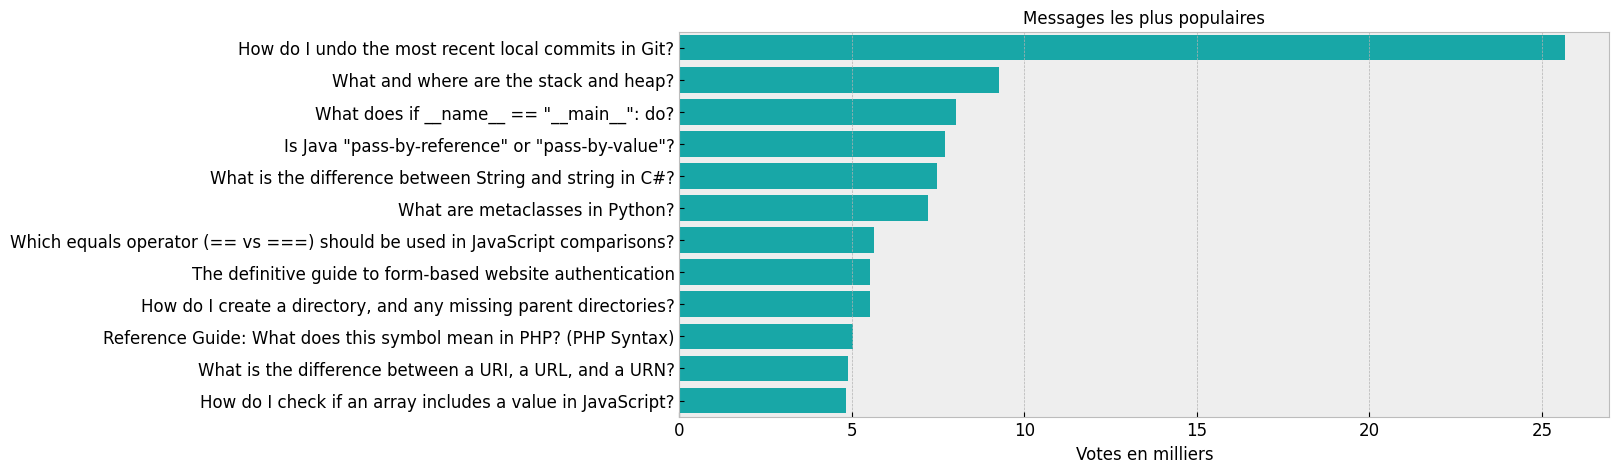

In [6]:
most_pop = df.sort_values(by=['Score'], ascending=False)[['Title', 'Score']].head(12)

most_pop['score1'] = most_pop['Score']/1000

plt.figure(figsize = (12,5))

sns.barplot(data = most_pop, y = 'Title', x = 'score1', color = 'c')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Votes en milliers', fontsize = 12)
plt.ylabel('')
plt.title('Messages les plus populaires', fontsize = 12)

Text(0.5, 1.0, 'Messages les plus vus')

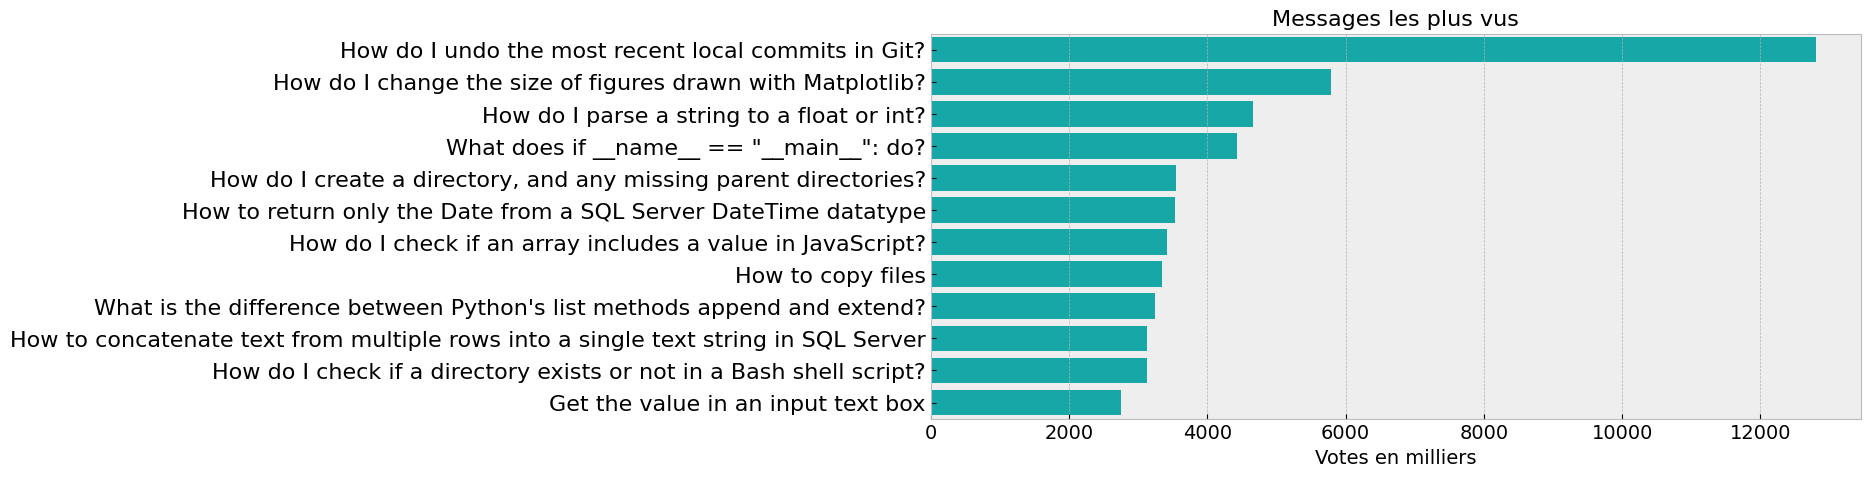

In [7]:
most_pop = df.sort_values(by=['ViewCount'], ascending=False)[['Title', 'ViewCount']].head(12)

most_pop['ViewCount1'] = most_pop['ViewCount']/1000

plt.figure(figsize = (12,5))

sns.barplot(data = most_pop, y = 'Title', x = 'ViewCount1', color = 'c')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.xlabel('Votes en milliers', fontsize = 14)
plt.ylabel('')
plt.title('Messages les plus vus', fontsize = 16)

Text(0.5, 1.0, 'Tags les plus populaires')

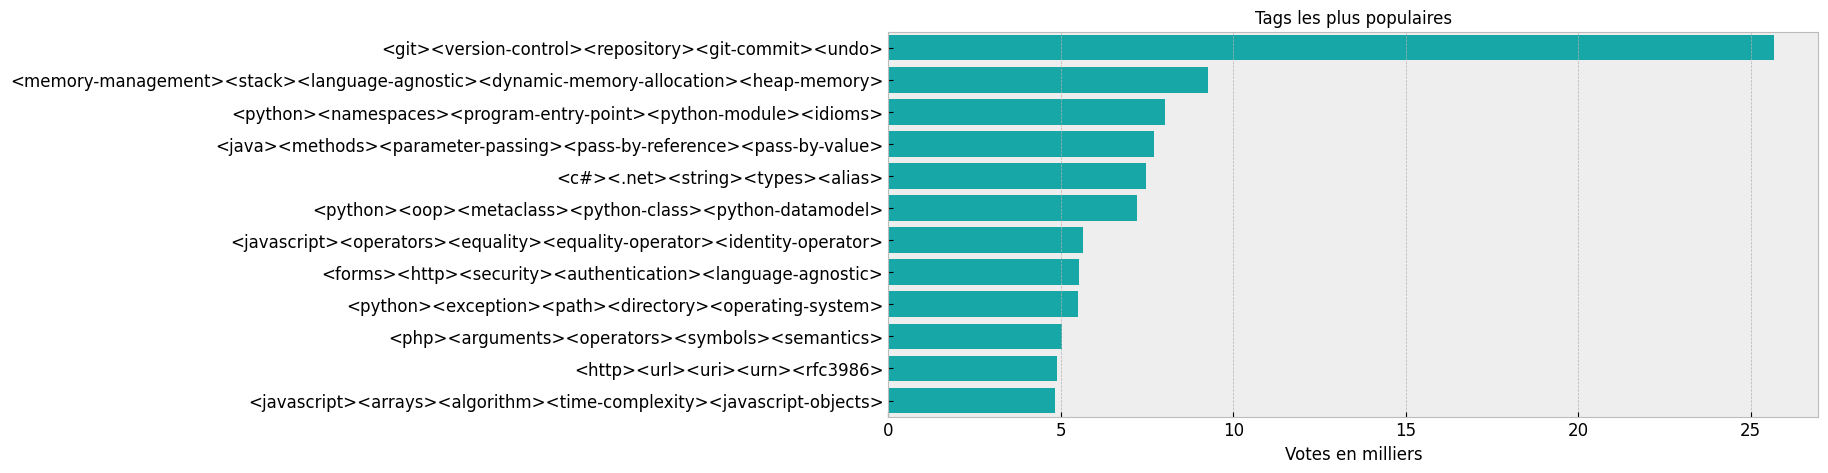

In [8]:
most_pop = df.sort_values(by=['Score'], ascending=False)[['Tags', 'Score']].head(12)

most_pop['score1'] = most_pop['Score']/1000

plt.figure(figsize = (12,5))

sns.barplot(data = most_pop, y = 'Tags', x = 'score1', color = 'c')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Votes en milliers', fontsize = 12)
plt.ylabel('')
plt.title('Tags les plus populaires', fontsize = 12)

Text(0.5, 1.0, 'Comments and votes')

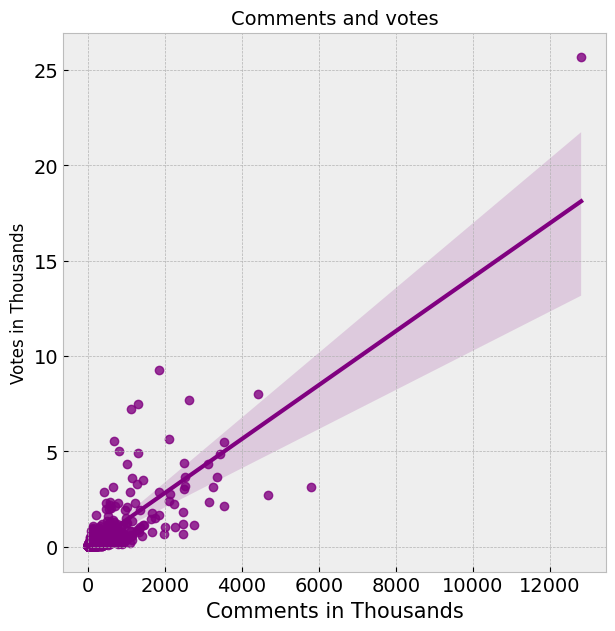

In [9]:
n = df.sort_values('Score', ascending =False)

n['Score1'] = n['Score']/1000
n['ViewCount1'] = n['ViewCount']/1000

plt.figure(figsize = (7,7))

sns.regplot(data = n, y = 'Score1', x = 'ViewCount1', color = 'purple')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('Comments in Thousands', fontsize = 15)
plt.ylabel('Votes in Thousands')
plt.title('Comments and votes', fontsize = 14)

In [10]:
data = df[['Title','Body','Tags','Score']]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10000 non-null  object
 1   Body    10000 non-null  object
 2   Tags    10000 non-null  object
 3   Score   10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


# Nettoyage de texte :"
Nous allons utiliser les fonctions importées par le fichier fonctions.py et passer par les étapes ci-dessous :

* Supprimer des charactaires Non_ASCII 
* Majuscules/ Minuscules
* Développer les contractions
* Supprimer les caractères spéciaux
* Supprimer les ponctuations
* Remplacez les fautes de frappe, l'argot, les acronymes ou les abréviations informelles
* Netoyage des StopWord

In [12]:
data['clean_Title'] = pd.Series([clean_text(i) for i in tqdm(data['Title'])])
data['clean_Body'] = pd.Series([clean_text(i) for i in tqdm(data['Body'])])

data.head()

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

,Title,Body,Tags,Score,clean_Title,clean_Body
0,WPF MVVM Correct way to fire event on view fro...,<p>In my WPF application I have 2 Windows (bot...,<.net><wpf><mvvm><binding><command>,22,wpf mvvm correct way to fire event on view fro...,in my wpf applic i have 2 window both window h...
1,How to identify if the DLL is Debug or Release...,<blockquote>\n <p><strong>Possible Duplicate:...,<.net><dll><build><debugging><release>,117,how to identifi if the dll is debug or releas ...,possibl duplic how to tell if a net applic was...
2,Collection was modified; enumeration operation...,"<p>I have ""Collection was modified; enumeratio...",<c#><http><exception><http-headers><httpclient>,10,collect was modifi enumer oper may not execut ...,i have collect was modifi enumer oper may not ...
3,Force CamelCase on ASP.NET WebAPI Per Controller,"<p>In ASP.NET WebAPI, I know you can set the d...",<asp.net><json><asp.net-web-api><json.net><cam...,34,forc camelcas on asp net webapi per control,in asp net webapi i know you can set the defau...
4,When is it Appropriate to use Generics Versus ...,<p>What are the situations and their associate...,<c#><.net><vb.net><generics><inheritance>,18,when is it appropri to use generic versus inherit,what are the situat and their associ benefit o...


In [13]:
data['Lemm_Body'] = pd.Series([lemmatize(i) for i in tqdm(data['clean_Body'])])
data['Lemm_Title'] = pd.Series([lemmatize(i) for i in tqdm(data['clean_Title'])])
data['stem_Body'] = pd.Series([stem(i) for i in tqdm(data['clean_Body'])])
data['stem_Title'] = pd.Series([stem(i) for i in tqdm(data['clean_Title'])])


data.head()

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

,Title,Body,Tags,Score,clean_Title,clean_Body,Lemm_Body,Lemm_Title,stem_Body,stem_Title
0,WPF MVVM Correct way to fire event on view fro...,<p>In my WPF application I have 2 Windows (bot...,<.net><wpf><mvvm><binding><command>,22,wpf mvvm correct way to fire event on view fro...,in my wpf applic i have 2 window both window h...,wpf applic window window viewmodel applic main...,wpf mvvm correct way fire event view viewmodel,in my wpf applic i have 2 window both window h...,wpf mvvm correct way to fire event on view fro...
1,How to identify if the DLL is Debug or Release...,<blockquote>\n <p><strong>Possible Duplicate:...,<.net><dll><build><debugging><release>,117,how to identifi if the dll is debug or releas ...,possibl duplic how to tell if a net applic was...,possibl duplic tell net applic compil debug re...,identifi dll debug relea build net,possibl duplic how to tell if a net applic was...,how to identifi if the dll is debug or relea b...
2,Collection was modified; enumeration operation...,"<p>I have ""Collection was modified; enumeratio...",<c#><http><exception><http-headers><httpclient>,10,collect was modifi enumer oper may not execut ...,i have collect was modifi enumer oper may not ...,collect modifi enumer oper execut popul random...,collect modifi enumer oper execut random pop http,i have collect was modifi enum oper may not ex...,collect was modifi enum oper may not execut ra...
3,Force CamelCase on ASP.NET WebAPI Per Controller,"<p>In ASP.NET WebAPI, I know you can set the d...",<asp.net><json><asp.net-web-api><json.net><cam...,34,forc camelcas on asp net webapi per control,in asp net webapi i know you can set the defau...,asp net webapi know set default json formatt u...,forc camelcas asp net webapi control,in asp net webapi i know you can set the defau...,forc camelca on asp net webapi per control
4,When is it Appropriate to use Generics Versus ...,<p>What are the situations and their associate...,<c#><.net><vb.net><generics><inheritance>,18,when is it appropri to use generic versus inherit,what are the situat and their associ benefit o...,situat associ benefit use generic inherit vice...,appropri use generic versus inherit,what are the situat and their associ benefit o...,when is it appropri to use generic versus inherit


#### Suppression des balise HTML et des punctuations de varible 'Tags'

In [14]:

data['clean_Tags'] = data['Tags'].str.replace('<', ' ')
data['clean_Tags'] = data['clean_Tags'].str.replace('>', '')
data['clean_Tags'] = pd.Series([lemmatize(i) for i in tqdm(data['clean_Tags'])])

data.head()

  0%|          | 0/10000 [00:00<?, ?it/s]

,Title,Body,Tags,Score,clean_Title,clean_Body,Lemm_Body,Lemm_Title,stem_Body,stem_Title,clean_Tags
0,WPF MVVM Correct way to fire event on view fro...,<p>In my WPF application I have 2 Windows (bot...,<.net><wpf><mvvm><binding><command>,22,wpf mvvm correct way to fire event on view fro...,in my wpf applic i have 2 window both window h...,wpf applic window window viewmodel applic main...,wpf mvvm correct way fire event view viewmodel,in my wpf applic i have 2 window both window h...,wpf mvvm correct way to fire event on view fro...,.net wpf mvvm bind command
1,How to identify if the DLL is Debug or Release...,<blockquote>\n <p><strong>Possible Duplicate:...,<.net><dll><build><debugging><release>,117,how to identifi if the dll is debug or releas ...,possibl duplic how to tell if a net applic was...,possibl duplic tell net applic compil debug re...,identifi dll debug relea build net,possibl duplic how to tell if a net applic was...,how to identifi if the dll is debug or relea b...,.net dll build debugging release
2,Collection was modified; enumeration operation...,"<p>I have ""Collection was modified; enumeratio...",<c#><http><exception><http-headers><httpclient>,10,collect was modifi enumer oper may not execut ...,i have collect was modifi enumer oper may not ...,collect modifi enumer oper execut popul random...,collect modifi enumer oper execut random pop http,i have collect was modifi enum oper may not ex...,collect was modifi enum oper may not execut ra...,http exception http header httpclient
3,Force CamelCase on ASP.NET WebAPI Per Controller,"<p>In ASP.NET WebAPI, I know you can set the d...",<asp.net><json><asp.net-web-api><json.net><cam...,34,forc camelcas on asp net webapi per control,in asp net webapi i know you can set the defau...,asp net webapi know set default json formatt u...,forc camelcas asp net webapi control,in asp net webapi i know you can set the defau...,forc camelca on asp net webapi per control,asp.net json asp.net web api json.net camelcase
4,When is it Appropriate to use Generics Versus ...,<p>What are the situations and their associate...,<c#><.net><vb.net><generics><inheritance>,18,when is it appropri to use generic versus inherit,what are the situat and their associ benefit o...,situat associ benefit use generic inherit vice...,appropri use generic versus inherit,what are the situat and their associ benefit o...,when is it appropri to use generic versus inherit,.net vb.net generic inheritance


### Analyse des Tage 
 #### Nombre total de Tages uniques 
    1. Importation et initialisation de l'objet "CountVectorizer", qui est l'outil Bagg of Words de scikit-learn.
    2. Par défaut, 'split()' marquera chaque balise en utilisant l'espace.
    3. fit_transform() fait deux fonctions
    4. Premièrement, il s'adapte au modèle et apprend le vocabulaire
    5. Deuxièmement, il transforme nos données d'entraînement en vecteurs de caractéristiques.
    6. L'entrée de fit_transform doit être une liste de chaînes.

In [15]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(data['clean_Tags'])

In [16]:
print("Nombre de points de données :", tag_dtm.shape[0])
print("Nombre de tags uniques :", tag_dtm.shape[1])

Nombre de points de données : 10000
Nombre de tags uniques : 6392


#### Certaines des Tags que nous avons

In [17]:
tags = vectorizer.get_feature_names_out()
print("Certaines des balises que nous avons :", tags[:10])

Certaines des balises que nous avons : ['.class' '.emf' '.htaccess' '.htpasswd' '.ico' '.net' '.net-2.0'
 '.net-3.5' '.net-4.0' '.net-4.5']


# Nombre de fois qu'un tag est apparu
documenter la matrice de termes dans un dictionnaire.

In [18]:
freqs = tag_dtm.sum(axis = 0).A1
result = dict(zip(tags, freqs))

In [19]:
data["tag_count"] = data["clean_Tags"].apply(lambda text: len(text.split(" ")) if text != None else 0 )

tag_df_sorted = data.sort_values(['tag_count'], ascending=False)
tag_counts = tag_df_sorted['tag_count'].values

## Tags par Question 

In [20]:

tag_quest_count = tag_dtm.sum(axis=1).tolist()

tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 10000 datapoints.
[5, 5, 5, 7, 4]


In [21]:


print( "Nombre maximum de tags par question : %d"%max(tag_quest_count))
print( "Nombre minimum de tags par question : %d"%min(tag_quest_count))
print( "Nombre moyen de tags par question : %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Nombre maximum de tags par question : 14
Nombre minimum de tags par question : 3
Nombre moyen de tags par question : 6.027900


Observations :
1. Nombre maximum de tags par question : 15
2. Nombre minimum de tags par question : 2
3. Moy. nombre de tags par question : 6.078550
4. La plupart des questions ont 6 tags

## Les top 100 des tags utilisées

In [22]:
top_N = 100

# tokenize
data['tok'] = data.clean_Tags.apply(nltk.tokenize.word_tokenize)

# all tokenized words to a list
words = data.tok.tolist()  # this is a list of lists
words = [word for list_ in words for word in list_]

# frequency distribution
word_dist = nltk.FreqDist(words)

# remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

# output the results
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,java,1174
1,python,1077
2,android,939
3,.net,935
4,javascript,910


## Les top 20 des tags 

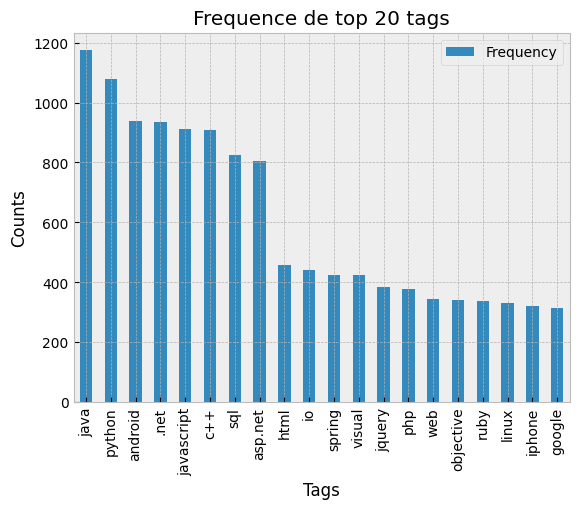

In [23]:
i = np.arange(20)
rslt.head(20).plot(kind='bar')
plt.title('Frequence de top 20 tags')
plt.xticks(i, rslt.head(20)["Word"])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. Java is the top most frequent programming language.
3. Android, Python, Javascript and .nat are among the top most frequent operating systems.

<h3>Tages les plus fréquentes </h3>

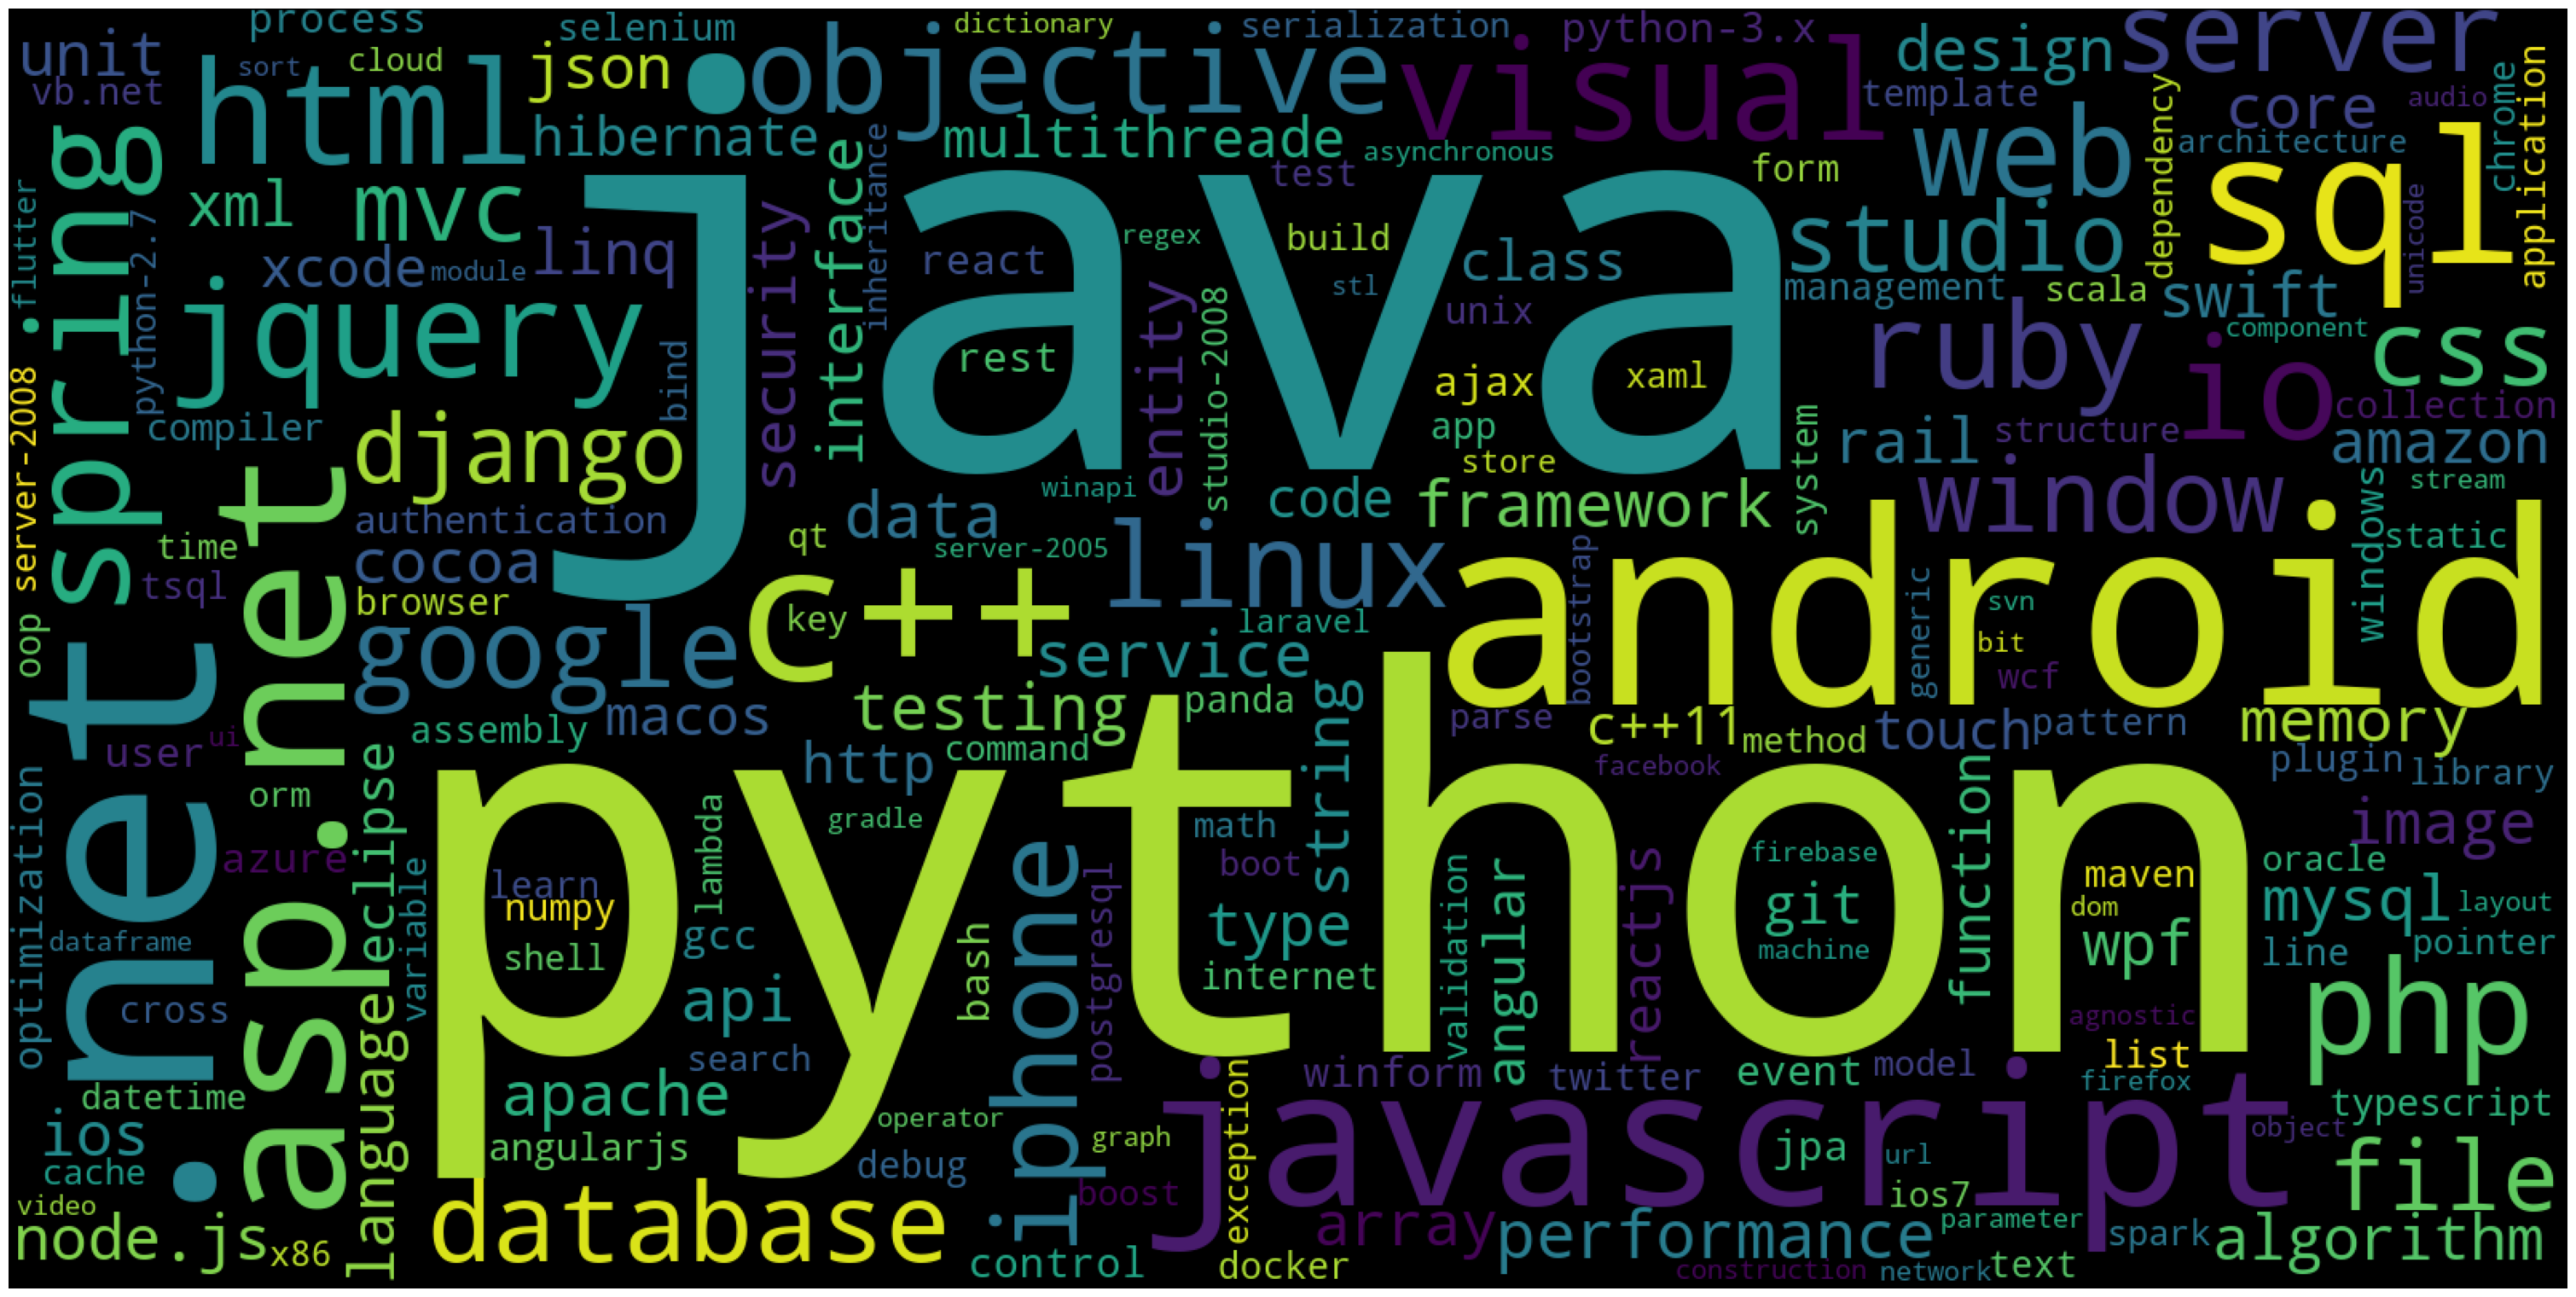

In [24]:
from wordcloud import WordCloud
# Convertissons d'abord le dictionnaire 'résultat' en 'liste de tuples'
tup = dict(result.items())
# Initialisation de WordCloud à l'aide de fréquences de tages.
wordcloud = WordCloud(    
    background_color='black', width=1600, height=800,
).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()


In [25]:
data.to_csv(r'df_clean.csv')